In [1]:
from Test_de_visualizacion import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

data_keys = ['radialDistance', 'heliographicLatitude', 'heliographicLongitude', 
             'BR', 'BT', 'BN', 'B', 'VR', 'VT', 'VN', 'ProtonSpeed', 'flow_theta', 'flow_lon', 
             'protonDensity', 'protonTemp']

data2018 = ObtenerDatas(data_keys,0,11)
data2019 = ObtenerDatas(data_keys,12,23)
data2020 = ObtenerDatas(data_keys,24,35)
data2021 = ObtenerDatas(data_keys,36,47)


Meses cargados:  1
Meses cargados:  2


KeyboardInterrupt: 

In [4]:
data2022 = ObtenerDatas(data_keys,48,60)
datos = [data2018,data2019,data2020,data2021,data2022]

Meses cargados:  1
Meses cargados:  2
Meses cargados:  3
Meses cargados:  4
Meses cargados:  5
Meses cargados:  6
Meses cargados:  7
Meses cargados:  8
Meses cargados:  9
Meses cargados:  10
Meses cargados:  11
Meses cargados:  12


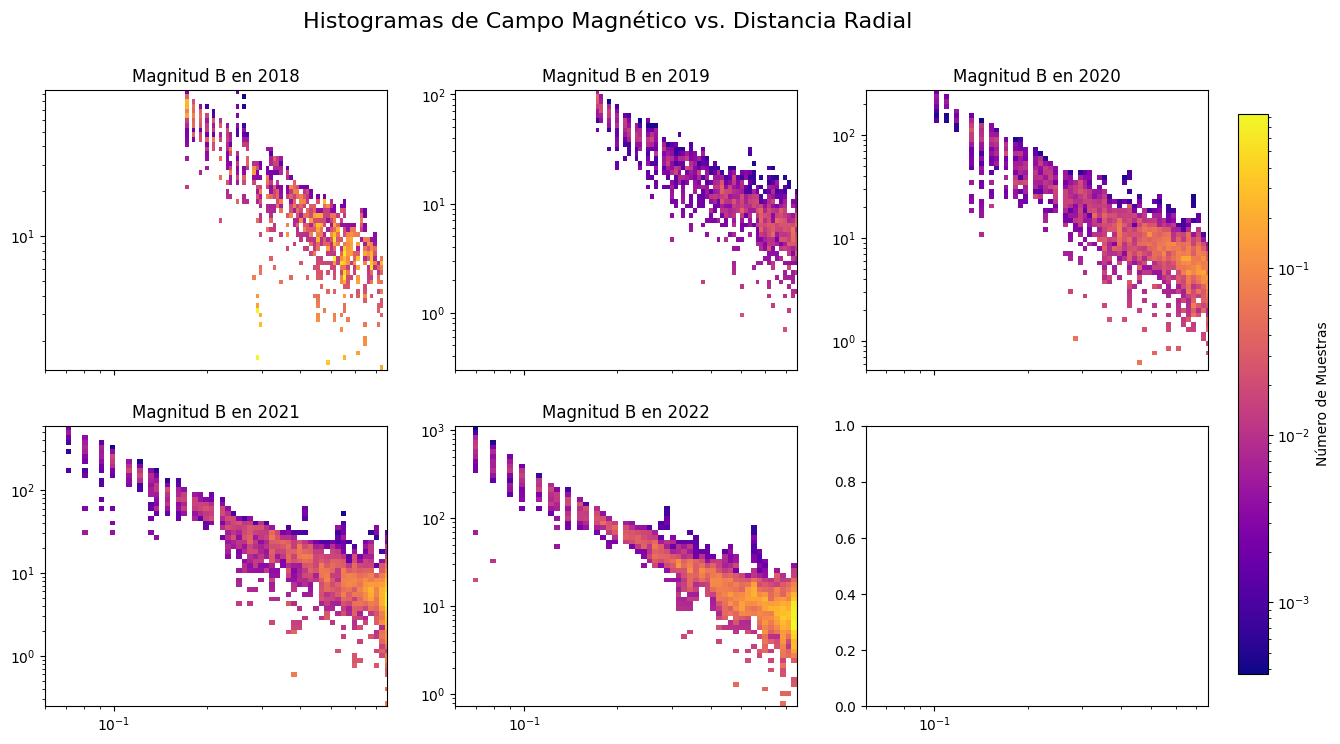

In [5]:

fig, axs = plt.subplots(2,3,figsize=(15,8), sharex=True)
i=0
j=0
for year in datos:
    fila = i // 3
    col = i % 3
    R = year[0]
    #BR = year[3]
    #BT = year[4]
    #BN = year[5]
    B = year[6]

    valid_indices = np.where(~np.isnan(R) & ~np.isnan(B))
    valid_R = R[valid_indices]
    valid_B = B[valid_indices]

    R_min, R_max = np.min(valid_R), np.max(valid_R)
    B_min, B_max = np.min(valid_B), np.max(valid_B)

    # separo el espacio de datos en 100 "cajitas" de ancho y de alto
    # utilizando escala logaritmica
    R_bins = np.logspace(np.log10(R_min), np.log10(R_max), 60)
    B_bins = np.logspace(np.log10(B_min), np.log10(B_max), 60)

    img = axs[fila][col].hist2d(valid_R, valid_B,  bins=(R_bins,B_bins), norm=colors.LogNorm(), cmap='plasma', density=True)
   

    axs[fila][col].set_xscale('log')
    axs[fila][col].set_yscale('log')
    axs[fila][col].set_title('Magnitud B en 20'+str(18+i))

    i += 1

cax = plt.gcf().add_axes([.92, 0.15, 0.02, 0.7])  # Posición de la barra de color
cb = plt.colorbar(img[-1], cax=cax) 
cb.set_label('Número de Muestras')
plt.suptitle('Histogramas de Campo Magnético vs. Distancia Radial', fontsize=16)
#plt.tight_layout()
plt.show()
